## Pipeline trainer

Designing a pipeline.

In [24]:
from sklearn.datasets import _samples_generator
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors



In [5]:

# Generate data 
X, y = _samples_generator.make_classification(
    n_samples=150, 
    n_features=25, 
    n_classes=3, 
    n_informative=6, 
    n_redundant=0, 
    random_state=7)


In [17]:
X.view()

array([[ 1.01856035, -0.1850947 ,  0.33953529, ..., -0.89722827,
         2.43356744, -0.69119524],
       [-0.27783108,  0.99897481,  0.53479038, ...,  0.22153721,
         1.2023667 ,  0.30568521],
       [ 0.03110801,  1.14511831,  0.28923459, ..., -1.05191555,
         0.09786165, -0.65803802],
       ...,
       [-0.26170774,  0.83418331,  0.9540871 , ...,  0.43996139,
         1.29141862,  0.58900801],
       [ 0.09728851, -2.19374974,  0.82561751, ...,  0.19169576,
         0.38328131,  1.45836114],
       [-0.11176114, -0.44320815, -0.8666994 , ...,  1.00486657,
         0.38439339,  1.38943378]])

In [18]:
y.view()

array([0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 1, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1,
       0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0,
       2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 1, 0, 2, 1,
       1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1,
       1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2])

In [6]:

# Select top K features 
k_best_selector = SelectKBest(f_regression, k=9)


In [19]:
print(k_best_selector)

SelectKBest(k=7, score_func=<function f_regression at 0x000001E4AAC2C4A0>)


In [7]:

# Initialize Extremely Random Forests classifier 
classifier = ExtraTreesClassifier(n_estimators=60, max_depth=4)


In [20]:
print(classifier)

ExtraTreesClassifier(max_depth=4, n_estimators=30)


In [ ]:

# Construct the pipeline
processor_pipeline = Pipeline([('selector', k_best_selector), ('erf', classifier)])


In [21]:
print(processor_pipeline)

Pipeline(steps=[('selector',
                 SelectKBest(k=7,
                             score_func=<function f_regression at 0x000001E4AAC2C4A0>)),
                ('erf', ExtraTreesClassifier(max_depth=4, n_estimators=30))])


In [9]:

# Set the parameters
processor_pipeline.set_params(selector__k=7, erf__n_estimators=30)


Pipeline(steps=[('selector',
                 SelectKBest(k=7,
                             score_func=<function f_regression at 0x000001E4AAC2C4A0>)),
                ('erf', ExtraTreesClassifier(max_depth=4, n_estimators=30))])

In [10]:

# Training the pipeline 
processor_pipeline.fit(X, y)


Pipeline(steps=[('selector',
                 SelectKBest(k=7,
                             score_func=<function f_regression at 0x000001E4AAC2C4A0>)),
                ('erf', ExtraTreesClassifier(max_depth=4, n_estimators=30))])

In [11]:

# Predict outputs for the input data
output = processor_pipeline.predict(X)
print("\nPredicted output:\n", output)



Predicted output:
 [0 2 2 0 2 0 2 1 0 1 1 2 2 0 2 2 1 0 0 1 0 2 1 1 2 2 0 0 1 2 1 2 1 0 2 2 1
 1 2 2 2 0 1 0 2 1 1 2 1 0 1 2 2 2 2 0 2 2 0 2 2 0 1 0 2 2 1 1 1 2 1 1 0 2
 0 0 1 1 2 0 0 2 2 2 2 0 0 0 2 2 2 1 2 0 2 1 2 2 0 0 1 1 1 1 2 2 2 2 0 1 1
 0 2 1 0 0 1 1 1 1 0 0 0 1 2 0 0 0 2 1 2 0 0 1 0 1 1 0 1 1 1 2 2 2 1 1 2 0
 2 2]


In [12]:

# Print scores 
print("\nScore:", processor_pipeline.score(X, y))



Score: 0.8866666666666667


In [13]:

# Print the features chosen by the pipeline selector
status = processor_pipeline.named_steps['selector'].get_support()


In [14]:

# Extract and print indices of selected features
selected = [i for i, x in enumerate(status) if x]
print("\nIndices of selected features:", ', '.join([str(x) for x in selected]))


Indices of selected features: 4, 7, 8, 12, 14, 17, 22


## Extracting NN

In [26]:
# Input data
X = np.array([[2.1, 1.3], [1.3, 3.2], [2.9, 2.5], [2.7, 5.4], [3.8, 0.9], 
        [7.3, 2.1], [4.2, 6.5], [3.8, 3.7], [2.5, 4.1], [3.4, 1.9],
        [5.7, 3.5], [6.1, 4.3], [5.1, 2.2], [6.2, 1.1]])


In [28]:
# Number of nearest neighbors
k = 5

In [45]:
# Test datapoint 
test_datapoint = [3.1, 2.5]

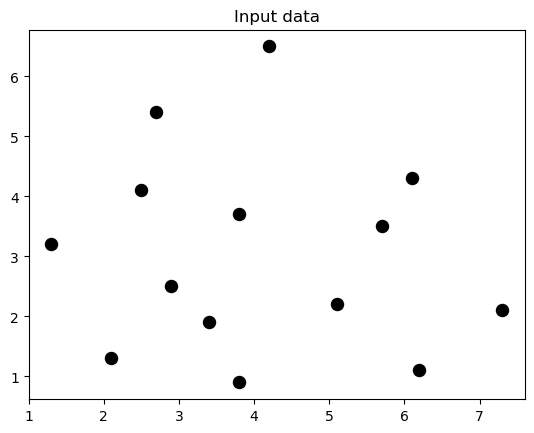

In [46]:
# Plot input data 
plt.figure()
plt.title('Input data')
plt.scatter(X[:,0], X[:,1], marker='o', s=75, color='black')

In [47]:
# Build K Nearest Neighbors model
knn_model = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)
distances, indices = knn_model.kneighbors([test_datapoint])


In [48]:
# Print the 'k' nearest neighbors
print("\nK Nearest Neighbors:")
for rank, index in enumerate(indices[0][:k], start=1):
    print(str(rank) + " ==>", X[index])



K Nearest Neighbors:
1 ==> [2.9 2.5]
2 ==> [3.4 1.9]
3 ==> [3.8 3.7]
4 ==> [2.1 1.3]
5 ==> [2.5 4.1]


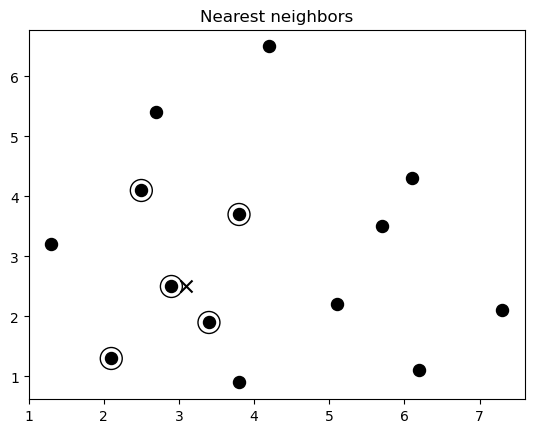

In [49]:
# Visualize the nearest neighbors along with the test datapoint 
plt.figure()
plt.title('Nearest neighbors')
plt.scatter(X[:, 0], X[:, 1], marker='o', s=75, color='k')
plt.scatter(X[indices][0][:][:, 0], X[indices][0][:][:, 1], 
        marker='o', s=250, color='k', facecolors='none')
plt.scatter(test_datapoint[0], test_datapoint[1],
        marker='x', s=75, color='k')

plt.show()

## Building KNN classifier

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets

In [58]:
import os
os.getcwdb()

b'c:\\Users\\advac\\Downloads\\github_repos\\project_recommand\\aiwpy_chap5'

In [61]:
# Load input data
input_file = 'data.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1].astype(int)


In [62]:
data.view()

array([[ 1.77,  2.67,  0.  ],
       [ 3.72,  4.03,  1.  ],
       [ 6.66,  2.89,  2.  ],
       [ 8.51,  1.98,  3.  ],
       [ 0.53,  2.98,  0.  ],
       [ 4.51,  5.47,  1.  ],
       [ 5.42,  0.26,  2.  ],
       [ 9.11,  3.03,  3.  ],
       [ 1.65,  4.28,  0.  ],
       [ 5.47,  5.72,  1.  ],
       [ 4.87,  2.6 ,  2.  ],
       [ 8.49,  3.17,  3.  ],
       [ 1.86,  2.95,  0.  ],
       [ 5.74,  5.18,  1.  ],
       [ 3.91,  2.6 ,  2.  ],
       [ 9.49,  3.23,  3.  ],
       [ 0.73,  3.78,  0.  ],
       [ 4.13,  5.46,  1.  ],
       [ 4.14,  2.49,  2.  ],
       [ 8.44,  2.86,  3.  ],
       [ 0.67,  2.95,  0.  ],
       [ 4.72,  4.31,  1.  ],
       [ 6.04,  1.29,  2.  ],
       [ 7.47,  3.96,  3.  ],
       [ 2.33,  3.27,  0.  ],
       [ 5.93,  6.3 ,  1.  ],
       [ 4.36,  0.34,  2.  ],
       [10.08,  3.29,  3.  ],
       [ 1.2 ,  2.41,  0.  ],
       [ 4.05,  4.49,  1.  ],
       [ 4.42,  1.51,  2.  ],
       [ 8.14,  3.26,  3.  ],
       [ 1.  ,  2.89,  0.  ],
       [ 4

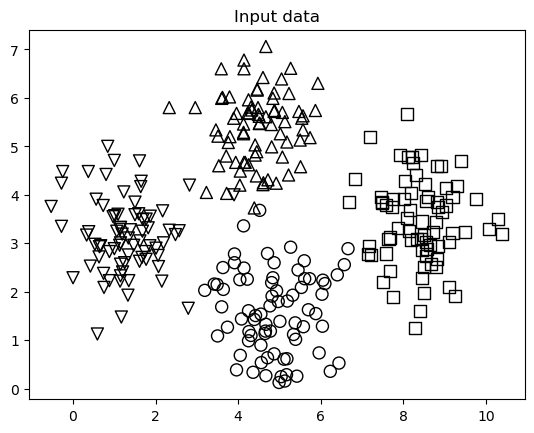

In [63]:
# Plot input data
plt.figure()
plt.title('Input data')
marker_shapes = 'v^os'
mapper = [marker_shapes[i] for i in y]
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=75, edgecolors='black', facecolors='none')


In [64]:
# Number of nearest neighbors 
num_neighbors = 12

In [65]:
# Step size of the visualization grid
step_size = 0.01  

In [ ]:
# Create a K Nearest Neighbours classifier model 
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance')

In [67]:
print(classifier)

KNeighborsClassifier(n_neighbors=12, weights='distance')


In [68]:
# Train the K Nearest Neighbours model
classifier.fit(X, y)

KNeighborsClassifier(n_neighbors=12, weights='distance')

In [69]:
# Create the mesh to plot the boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), 
        np.arange(y_min, y_max, step_size))

In [70]:
# Evaluate the classifier on all the points on the grid 
output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

Text(0.5, 1.0, 'K Nearest Neighbors classifier model boundaries')

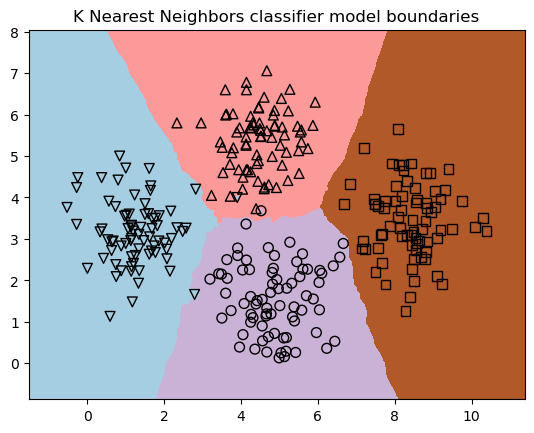

In [77]:
# Visualize the predicted output 
output = output.reshape(x_values.shape)
plt.figure()
plt.pcolormesh(x_values, y_values, output, cmap=cm.Paired)
# Overlay the training points on the map
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=50, edgecolors='black', facecolors='none')

plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())
plt.title('K Nearest Neighbors classifier model boundaries')

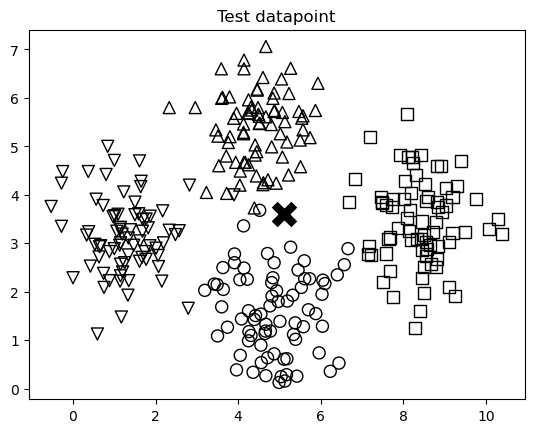

In [73]:
# Test input datapoint
test_datapoint = [5.1, 3.6]
plt.figure()
plt.title('Test datapoint')
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=75, edgecolors='black', facecolors='none')

plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', 
        linewidth=6, s=200, facecolors='black')

In [75]:
# Extract the K nearest neighbors
_, indices = classifier.kneighbors([test_datapoint])
indices = indices.astype(int)[0]

Predicted output: 1


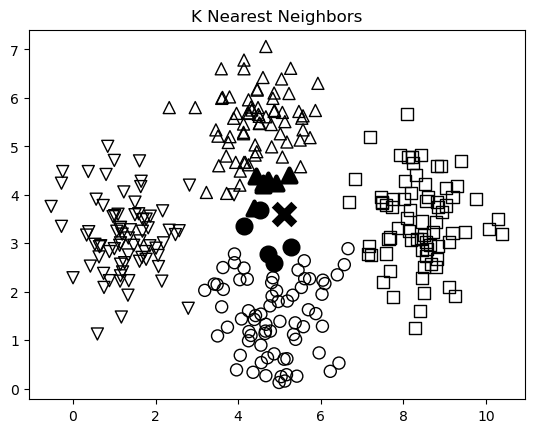

In [76]:
# Plot k nearest neighbors
plt.figure()
plt.title('K Nearest Neighbors')

for i in indices:
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[y[i]], 
            linewidth=3, s=100, facecolors='black')

plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', 
        linewidth=6, s=200, facecolors='black')

for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=75, edgecolors='black', facecolors='none')

print("Predicted output:", classifier.predict([test_datapoint])[0])

plt.show()


## computing similarity scores

In [79]:
import argparse
import json
import numpy as np